In [2]:
import numpy as np

class Perceptron:
    """
    Perceptron classifier: This implementation of the Perceptron expects 
    binary class labels in {0, 1}.
    
    Parameters
        eta : float (default: 0.1), Learning rate (between 0.0 and 1.0)
        epochs : int (default: 10), Number of passes over the training dataset.
            Prior to each epoch, the dataset is shuffled to prevent cycles.
        random_seed : int, Random state for initializing random weights and shuffling.
        
        X0: If True, then X must have X_0 = 1 in all samples.
                Set it Faslse, if X does not have X_0 
    
    Attributes
        w  : 1d-array, shape={n_features, }, Model weights after fitting. Includes bias
        w_ : 2d-array, shape={epochs, n_features}, Weights in every epoch
        cost_ : list, Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.1, epochs=10, random_seed=1):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed

    def fit(self, X, y, X0=False):
        if X0 == False:
            X = np.c_[ np.ones(len(y)), X]   
            
        np.random.seed(self.random_seed)
        self.w = np.random.random(X.shape[1]) 
    
        self.maxy, self.miny = y.max(), y.min()
        self.cost_ = []
        self.w_ = np.array([self.w])
        
        for i in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                yhat = self.activate(xi)
                if yi != yhat:
                    delta = self.eta * (yi - yhat) * xi    
                    self.w = self.w + delta 
                    errors += 1
            self.cost_.append(errors)
            self.w_ = np.vstack([self.w_, self.w])
        return self

    def net_input(self, X):        
        if X.shape[0] == self.w.shape[0]:
            z = np.dot(self.w.T, X)
        else:                       
            z = np.dot(X, self.w[1:]) + self.w[0]
        return z

    def activate(self, X):
        mid = (self.maxy + self.miny) / 2
        Z = self.net_input(X)
        return np.where(Z > mid, self.maxy, self.miny)
    
    def predict(self, X):     
        return self.activate(X)

In [3]:
!head -5 data/joy_data.txt

1.72	3.12	1
0.31	1.85	1
1.56	2.85	1
2.64	2.41	1
1.23	2.54	1


In [4]:
!tail -5 data/joy_data.txt

-2.26	0.01	-1
-1.41	-0.23	-1
-1.20	-0.71	-1
-1.69	0.70	-1
-1.52	-1.14	-1


In [6]:
import joy
X, y = joy.joy_data()
print('X.shape={}, y.shape={}'.format(X.shape, y.shape))
print(X[:5], y[:5])
print(X[-5:], y[-5:])

X.shape=(100, 2), y.shape=(100,)
[[1.72 3.12]
 [0.31 1.85]
 [1.56 2.85]
 [2.64 2.41]
 [1.23 2.54]] [1 1 1 1 1]
[[-2.26  0.01]
 [-1.41 -0.23]
 [-1.2  -0.71]
 [-1.69  0.7 ]
 [-1.52 -1.14]] [-1 -1 -1 -1 -1]


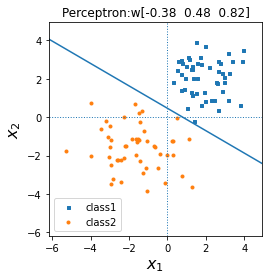

In [13]:
import joy
X, y = joy.joy_data()
ppn = joy.Perceptron(eta=0.1, epochs=10)
ppn.fit(X,y)
joy.plot_xyw(X,y, ppn.w)

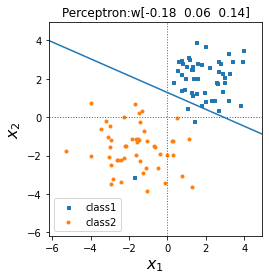

In [14]:
import joy
X, y = joy.joy_Ndata()
ppn = joy.Perceptron(eta=0.1, epochs=10)
ppn.fit(X,y)
joy.plot_xyw(X,y, ppn.w)

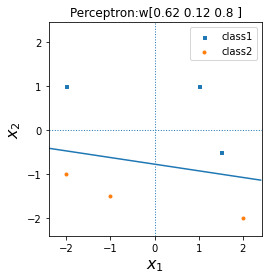

In [15]:
import joy
X, y = joy.toy_data()
ppn = joy.Perceptron(eta=0.1, epochs=10)
ppn.fit(X,y)
joy.plot_xyw(X,y, ppn.w)

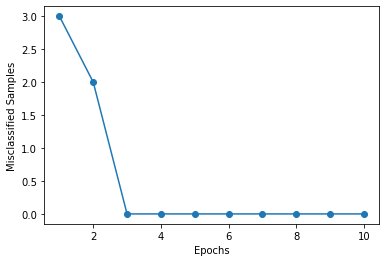

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(ppn.cost_)+1), ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassified Samples')
plt.savefig('Epochs', dpi=150)

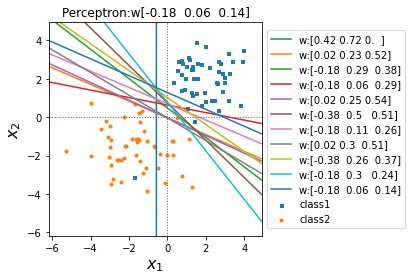

In [16]:
X,y = joy.getXy('data/joy_dataNoise.txt')
ppn = joy.Perceptron(eta=0.1, epochs=10)
ppn.fit(X,y)
joy.plot_xyw(X,y, ppn.w_, savefig='joy_dataNoise')

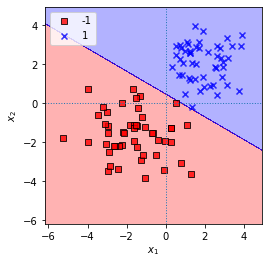

In [18]:
import joy
X,y = joy.joy_data()
ppn = joy.Perceptron(eta=0.1, epochs=10)
ppn.fit(X,y)
joy.plot_decision_regions(X,y,ppn)